In [1]:
from sklearn import linear_model
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from scipy import stats
%matplotlib inline

* preprocessing.StandardScaler
* preprocessing.MinMaxScaler
* model_selection.cross_val_score
* preprocessing.QuantileTransformer - преобразует любое распределение к нормальному 
* preprocessing.PolynomialFeatures - создание синтетических признаков

### Заполнение пропусков

учимся работать с nan 

In [2]:
preprocessing.Imputer?

In [5]:
X = np.array([[1, 2], [np.nan, 3], [7, 6]])
X

array([[ 1.,  2.],
       [nan,  3.],
       [ 7.,  6.]])

In [6]:
imp = preprocessing.Imputer(missing_values=np.nan, strategy='mean', verbose=0)
imp.fit(X) # fit просто нашел среднее и записал его куда-то

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


Imputer(axis=0, copy=True, missing_values=nan, strategy='mean', verbose=0)

In [7]:
Y = np.array([[np.nan, 2], [6, np.nan], [7, 6]])

In [8]:
Y # тестовая выборка

array([[nan,  2.],
       [ 6., nan],
       [ 7.,  6.]])

In [9]:
print('трансформированный исходный массив\n', imp.transform(X))
print('трансформированный новый массив\n', imp.transform(Y))

трансформированный исходный массив
 [[1. 2.]
 [4. 3.]
 [7. 6.]]
трансформированный новый массив
 [[4.         2.        ]
 [6.         3.66666667]
 [7.         6.        ]]


In [10]:
df = pd.DataFrame([['b', 'x'],
                   [np.nan, 'y'],
                   ['a', np.nan],
                   ['b', 'y']], dtype='category')




In [11]:
df

,0,1
0,b,x
1,NaN,y
2,a,NaN
3,b,y


In [12]:
df.fillna(method='ffill')

,0,1
0,b,x
1,b,y
2,a,y
3,b,y


In [13]:
df.dropna()

,0,1
0,b,x
3,b,y


### Отбор признаков

отфильтровываем признаки, которые точно не понадобятся

Сколько нужно наблюдений? нам нужно 1. избежать переобучения, 2. сэкономить деньги компании, минимум наблюдений

факторы(f)
наблюдения(o)

Правила:
1. если o/f >= 100 , то все хорошо, переобучения гарантированно не будет. 
То есть если 20 факторов, то нужно 2000 наблюдений. 2000/20

2. если 100 > o/f >= 10, то это минимальный порог, при котором можно избежать переобучения. То есть 20 наблюдений - это край.





In [14]:
from sklearn import feature_selection as fs

In [15]:
fs.SelectKBest

sklearn.feature_selection.univariate_selection.SelectKBest

### Предсказание рейтинга рецептов

In [16]:
df =pd.read_csv('epi_r.csv')

In [17]:
df.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
df.drop('title', axis=1, inplace=True)

In [19]:
y = np.array(df['rating'])

In [20]:
y

array([2.5  , 4.375, 3.75 , ..., 4.375, 4.375, 4.375])

In [21]:
df.drop('rating', axis=1, inplace=True)

In [22]:
df.head()

,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,advance prep required,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
df.calories.isna().sum()

4117

In [24]:
X = df.values

In [25]:
X.shape # 20052

(20052, 678)

In [28]:
from sklearn import model_selection

In [30]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.33, random_state=42)

In [31]:
X_train_full = np.c_[X_train, y_train]

In [32]:
X_train_full.shape

(13434, 679)

In [33]:
X_train_full_filtered = X_train_full[(X_train_full[:, 0] < 3358000)|(np.isnan(X_train_full[:, 0]))]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.


In [34]:
X_train_full_filtered.shape

(13427, 679)

In [35]:
y_train = X_train_full_filtered[:, -1] # обратно получили y из объединенного массива

In [36]:
X_train = X_train_full_filtered[:, :-1]  # обратно получили X из объединенного массива

In [37]:
imp = preprocessing.Imputer(missing_values=np.nan, strategy='mean', verbose=0)
imp.fit(X_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


Imputer(axis=0, copy=True, missing_values=nan, strategy='mean', verbose=0)

In [38]:
X_train_filledna = imp.transform(X_train)

In [39]:
X_test_filledna = imp.transform(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


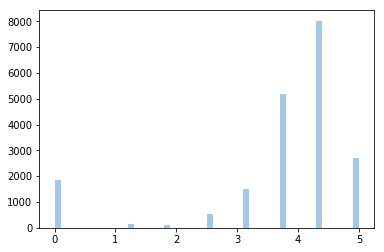

In [40]:
sns.distplot(y, kde=False)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


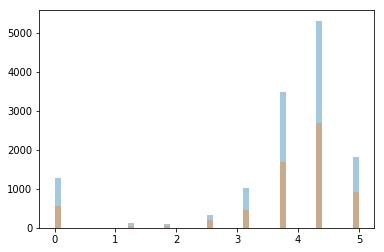

In [41]:
sns.distplot(y_train, kde=False)
sns.distplot(y_test, kde=False)
plt.show()


In [42]:
lr = linear_model.LinearRegression()

In [43]:
lr.fit(X_train_filledna, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [44]:
lr.coef_

array([-4.77305927e-05,  7.27195440e-04,  6.53077665e-04, -2.51783530e-06,
        8.76619787e-02,  1.94153121e+00,  1.00865802e+00, -1.23329738e+00,
        3.42165884e-01, -1.89306393e-01, -3.48804959e-01, -1.35275905e-02,
       -4.46294066e-01,  1.14301006e-01,  4.25971002e-01, -1.17862355e-01,
        1.30631825e-01, -1.41886705e-01, -4.03162586e-01, -1.13781208e+00,
       -1.13909618e-02,  4.61885542e-02, -1.84106214e-01,  5.69330688e-02,
        1.59052509e-01, -6.48136655e-02,  2.09502613e-01, -8.25114679e-01,
        1.29250298e-01,  5.24208516e+08,  3.43512153e-01,  8.87005855e-03,
        3.37989006e-02,  1.57491544e-01,  1.34748623e-01,  8.63166653e-02,
        1.53150341e-01, -1.97829393e-01,  4.16730729e-02,  3.81066347e-02,
        5.68970221e-02,  2.39549069e-01,  9.08826235e-02,  9.37438569e-02,
        1.07221880e-01,  6.08974334e-01,  3.23122835e-01, -8.99912715e-03,
        1.10195527e-01,  1.77183690e-02, -4.16623028e-02,  2.12104633e-01,
        1.71343878e-01,  

In [45]:
X_test[0]

array([6.130e+02, 3.800e+01, 2.600e+01, 1.055e+03, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 

In [46]:
lr.predict([X_test[0]])

array([3.30865531])

In [47]:
y_test[0]

4.375

In [48]:
from sklearn import metrics

In [50]:
predicts_test = lr.predict(X_test_filledna)
predicts_train = lr.predict(X_train_filledna)

In [52]:
predicts_test.shape

(6618,)

In [53]:
predicts_train.shape

(13427,)

In [54]:
metrics.mean_absolute_error(y_test, predicts_test)

145270.69541277844

In [55]:
predicts_test

array([3.30865531, 4.33184053, 3.60741246, ..., 4.18544438, 3.5417235 ,
       3.91412542])

In [56]:
y_test

array([4.375, 2.5  , 2.5  , ..., 3.75 , 3.75 , 4.375])

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


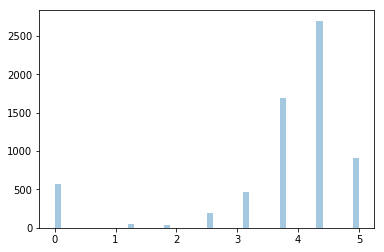

In [57]:
sns.distplot(y_test, kde=False)


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


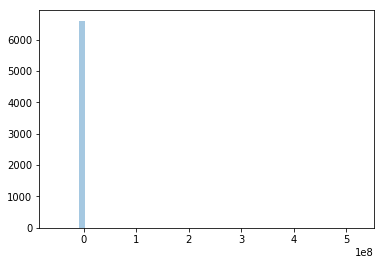

In [61]:
sns.distplot(predicts_test, kde=False)

In [59]:
predicts_test[predicts_test>5]

array([5.52041092e+00, 5.20100980e+00, 1.17749672e+03, 5.24956901e+00,
       5.87487277e+00, 5.24208520e+08, 5.00801459e+00, 5.00344154e+00,
       9.22618772e+07, 5.15778720e+00, 5.25663938e+00, 5.60428915e+00,
       5.04344350e+00, 5.94362437e+07, 5.19838057e+00, 5.04677087e+00,
       2.43905427e+01, 5.01558159e+00, 5.94362431e+07, 5.33691223e+00,
       5.10536475e+00, 5.15420876e+00, 5.20495368e+00, 5.53949448e+00,
       5.02867339e+00, 2.53687393e+01, 5.59854096e+00, 7.27934194e+00,
       5.14510346e+00, 5.05048178e+00, 5.19374608e+00, 5.26120762e+00,
       5.08793318e+00, 1.17640845e+03, 7.06449229e+00, 5.16810382e+00,
       5.24460380e+00, 5.11019190e+00, 5.52041092e+00, 5.00065068e+00,
       5.41995515e+00, 5.03272166e+00, 5.51718381e+00, 5.52561869e+07,
       5.04058606e+00, 9.22618773e+07, 5.52772964e+00, 5.39266810e+00])

In [66]:
nn = np.c_[X_test, predicts_test]

In [71]:
#nn[:, -1]
nn[nn[:, -1]>1000][1]

array([3.1900000e+02, 2.3000000e+01, 1.0000000e+01, 1.5450000e+03,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


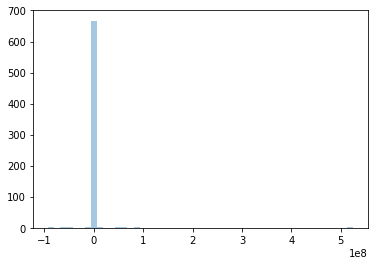

In [73]:
sns.distplot(lr.coef_, kde=False)

In [75]:
c = np.c_[df.columns, lr.coef_]

In [77]:
c[c[:, 1] > 1000]

array([['aspen', 524208516.3405844],
       ['caviar', 18050124.396094084],
       ['england', 7160283.182869981],
       ['frittata', 1174.4328522514052],
       ['hummus', 55256185.307286404],
       ['louisiana', 92261873.48065047],
       ['rub', 59436239.16997055]], dtype=object)

!!!! Мы получили большую ошибку, так как возникли большие коэффициенты, 
то есть возникло переобучение.
Поэтому надо коэффициенты уменьшать, для этого используем Ridge регрессию

alpha - коэф-т наказания модели. 
Чем он больше, тем меньше коэф-ты, но выше ошибка, то есть вероятность недообучения

In [92]:
lr = linear_model.Ridge(alpha=5)

lr.fit(X_train_filledna, y_train)

Ridge(alpha=5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [93]:
c = np.c_[df.columns, lr.coef_]

In [94]:
c[c[:, 1] > 1000]

array([], shape=(0, 2), dtype=object)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


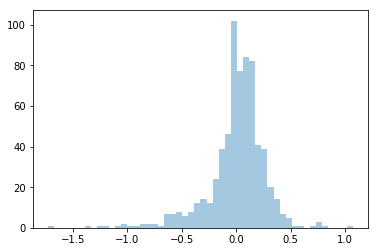

In [95]:
sns.distplot(lr.coef_, kde=False)

In [96]:
predicts_test = lr.predict(X_test_filledna)
predicts_train = lr.predict(X_train_filledna)

In [97]:
metrics.mean_absolute_error(y_test, predicts_test)

0.8637374542669505

In [98]:
metrics.mean_absolute_error(y_train, predicts_train)

0.8255613153703523

In [103]:
lr.predict(X_test[0].reshape(1, -1))

array([3.2989029])

In [104]:
y_test[0]

4.375